<a href="https://colab.research.google.com/github/EmoreiraV/LSCUoG/blob/main/linear_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First we'll import the necessary libraries

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

plt.style.use('ggplot')
np.random.seed(0)

### Create some data to play with

In [ ]:
# create N data points
N = 50

xdata = np.linspace(0, 5, N)

beta0=2
beta1=2
epsilon = 1
ydata= beta0 + beta1*xdata + epsilon*np.random.normal(size=N)


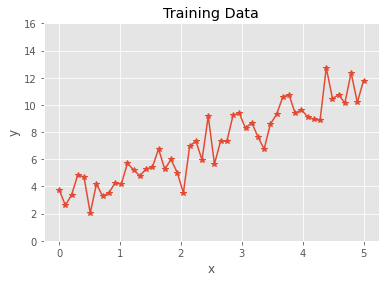

In [ ]:
# Plot of Training Data
plt.plot(xdata, ydata,'*-')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,16)
plt.title("Training Data")
plt.show()


### Use TensorFlow to perform linear regression, assuming the relationship between $x$ and $y$ is
$y = \beta_0 + \beta_1 x + \epsilon$

### Create the variables we're going to train



In [ ]:
b0 = tf.Variable(0.0)
b1 = tf.Variable(0.0)

### Define our statistical model

In [ ]:
def linear_model(x):
   return tf.add(tf.multiply(x, b1), b0)

**Define our loss function as the mean of the squared differences between the observed $y$ and the prediction**

In [ ]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

**Set up our TensorFlow optimizer to train parameters**

In [ ]:
# learning rate
lr = 1e-3

# Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(lr)

### Set up Tensorflow training loop

In [ ]:
def train(x, y):
    with tf.GradientTape() as tape:
        predicted = linear_model(x)
        current_loss = loss(y, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
    return b1, b0, predicted, current_loss

### Use the training loop to train on the dataset

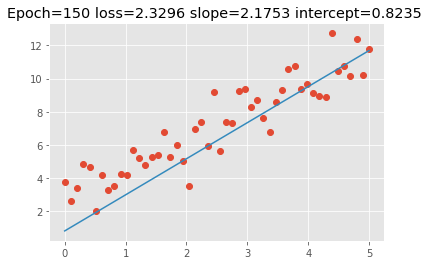

In [ ]:
epochs = range(150)
for epoch in epochs:
    with tf.GradientTape() as tape:
        prediction = linear_model(xdata)
        current_loss = loss(ydata, prediction)
    gradients = tape.gradient(current_loss, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1 ,b0]))

    plt.clf()
    plt.plot(xdata, ydata, 'o', label ='Original data')
    plt.plot(xdata, prediction, label ='Fitted line')
    #plt.title('Epoch {} loss {:.4f} slope {:.4f} intercept {:.4f} '.format((epoch + 1), training_loss, slope, intercept))
    plt.title('Epoch=%3d loss=%.4f slope=%.4f intercept=%.4f ' % ((epoch + 1), current_loss, b1, b0))

    display.display(plt.gcf())
    display.clear_output(wait=True)



**Without the plots**

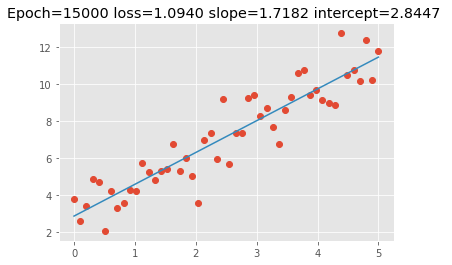

In [ ]:
epochs = range(15000)
for epoch in epochs:
    with tf.GradientTape() as tape:
        prediction = linear_model(xdata)
        current_loss = loss(ydata, prediction)
    gradients = tape.gradient(current_loss, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1 ,b0]))

plt.clf()
plt.plot(xdata, ydata, 'o', label ='Original data')
plt.plot(xdata, prediction, label ='Fitted line')
#plt.title('Epoch {} loss {:.4f} slope {:.4f} intercept {:.4f} '.format((epoch + 1), training_loss, slope, intercept))
plt.title('Epoch=%3d loss=%.4f slope=%.4f intercept=%.4f ' % ((epoch + 1), current_loss, b1, b0))

display.display(plt.gcf())
display.clear_output(wait=True)



In [ ]:
# Calculating the predictions
predictions = b1.numpy() * xdata + b0.numpy()
print("Training loss =", current_loss, "slope =", b1, "intercept =", b0, '\n')

Training loss = tf.Tensor(1.0939683, shape=(), dtype=float32) slope = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.7181891> intercept = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.8446872> 



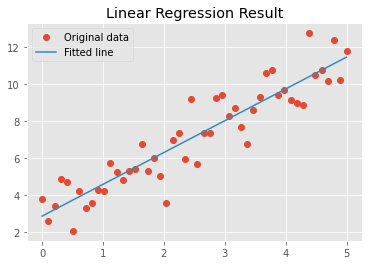

In [ ]:
# Plotting the Results
plt.plot(xdata, ydata, 'o', label ='Original data')
plt.plot(xdata, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
#plt.axis([-10,110,0,250])
plt.show()